In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

from scipy.stats import uniform
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file
names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels',
         'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
         'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", na_values="?", names=names)

In [3]:
# Show data
data.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
# Look the data with descriptive statistics
types = data.dtypes
shape = data.shape
description = data.describe()

In [5]:
# Show descriptions
description

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


EXPLORATORY DATA ANALYSIS

In [ ]:
# Look at the percentage of missing values
missing_percentage = (data.isna().sum()/len(data)*100).round(2)
print(missing_percentage)
# Here the normalized_losses feature has moderate number of missing value.

symboling             0.00
normalized_losses    20.00
make                  0.00
fuel_type             0.00
aspiration            0.00
num_of_doors          0.98
body_style            0.00
drive_wheels          0.00
engine_location       0.00
wheel_base            0.00
length                0.00
width                 0.00
height                0.00
curb_weight           0.00
engine_type           0.00
num_of_cylinders      0.00
engine_size           0.00
fuel_system           0.00
bore                  1.95
stroke                1.95
compression_ratio     0.00
horsepower            0.98
peak_rpm              0.98
city_mpg              0.00
highway_mpg           0.00
price                 1.95
dtype: float64


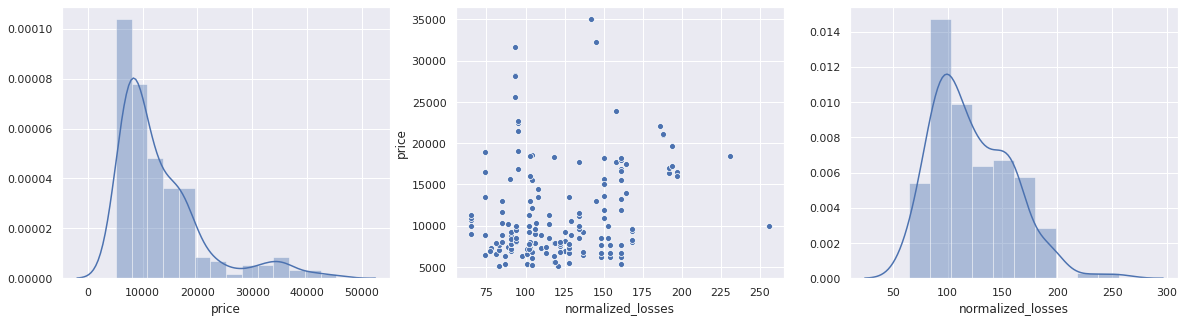

In [ ]:
# Plot the distribution of target variable 'price', normalized_loss variable and its relationship with price
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.distplot(data['price'], ax=ax[0])
sns.scatterplot(data['normalized_losses'], data['price'],ax=ax[1])
sns.distplot(data['normalized_losses'], ax=ax[2])

In [ ]:
# Plot the heatmap
data_corr = data.corr()
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

data_corr = data.corr()
data_corr[np.abs(data_corr)<.25] = 0
plt.figure(figsize=(15,10))
sns.heatmap(data_corr,vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask=mask)

# curb_weight, engine_size and horsepower are positively correlated to each other, and to the price
# city_mpg and highway_mpg are negatively correlated to curb_weight, engine_size and horsepower, and also to the price

NameError: ignored

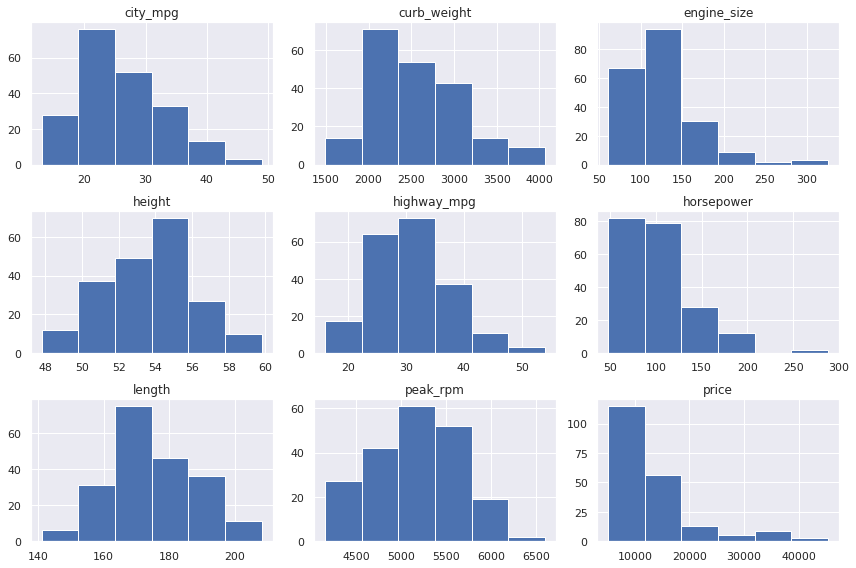

In [ ]:
# Histograms of numerical data
data[['length', 'height','curb_weight', 'engine_size','horsepower', 'peak_rpm',
      'city_mpg','highway_mpg','price']].hist(figsize=(12,8),bins=6,color='B')

plt.tight_layout()
plt.show()

# Most cars have around 1900-3200 in curb_weight, 60-190 in engine_size, 60-130 in horsepower.
# Car price mostly vary around 5000-18000
# city_mpg and highway_mpg are mainly distributed from 20 to 38, and from 22 to 41, respectively
# peak_rpm falls between 4600 and 5800

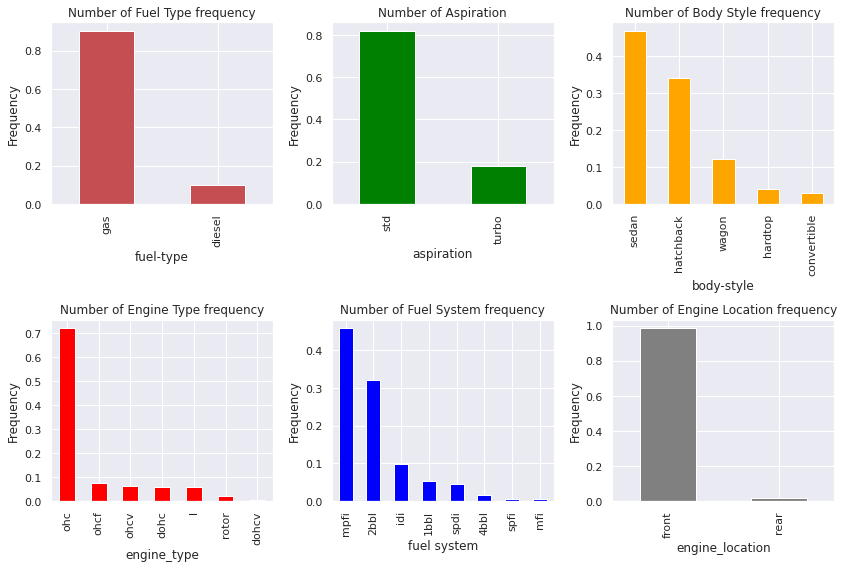

In [ ]:
# Visualizing catetegorical data
plt.figure(1)

plt.subplot(231)
data['fuel_type'].value_counts(normalize= True).plot(figsize=(12,8),kind='bar',color='R')
plt.title("Number of Fuel Type frequency")
plt.ylabel('Frequency')
plt.xlabel('fuel-type');

plt.subplot(232)
data['aspiration'].value_counts(normalize=True).plot(figsize=(12,8),kind='bar',color='green')
plt.title("Number of Aspiration")
plt.ylabel('Frequency')
plt.xlabel('aspiration');

plt.subplot(233)
data['body_style'].value_counts(normalize=True).plot(figsize=(12,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency")
plt.ylabel('Frequency')
plt.xlabel('body-style');

plt.subplot(234)
data['engine_type'].value_counts(normalize=True).plot(figsize=(12,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency")
plt.ylabel('Frequency')
plt.xlabel('engine_type');

plt.subplot(235)
data['fuel_system'].value_counts(normalize=True).plot(figsize=(12,8),kind='bar',color='blue')
plt.title("Number of Fuel System frequency")
plt.ylabel('Frequency')
plt.xlabel('fuel system');

plt.subplot(236)
data['engine_location'].value_counts(normalize=True).plot(figsize=(12,8),kind='bar',color='gray')
plt.title("Number of Engine Location frequency")
plt.ylabel('Frequency')
plt.xlabel('engine_location');

plt.tight_layout()
plt.show()

# More than 85% of cars uses gas for engines
# Around 80% of cars is standard model, while one-fifth is turbo model
# Sedan (48%) and Hatchback (32%) are preferred body style
# More than 70% of engine type is ohc
# Most of fuel system are mpfi and 2bbl
# Nearly 100% engine is located in front

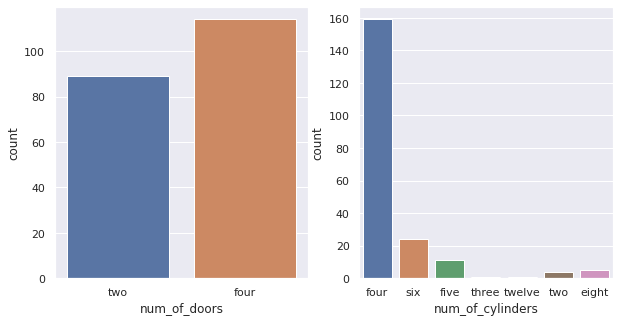

In [ ]:
# Plotting categorical data which contains numeric values
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

sns.countplot('num_of_doors', data=data,  orient='v' , ax=ax1)
sns.countplot('num_of_cylinders', data=data,  orient='v' , ax=ax2)

# 57% of cars has four doors
# Most of cars has four cylinders

# We replace these object data to numerical data
try:
  data = data.replace({'num_of_doors': {'two':2, 'four':4}})
  data = data.replace({'num_of_cylinders': {'four':4, 'six':6, 'five':5, 'eight':8, 'two':2, 'three':3, 'twelve':12}})
except:
  pass

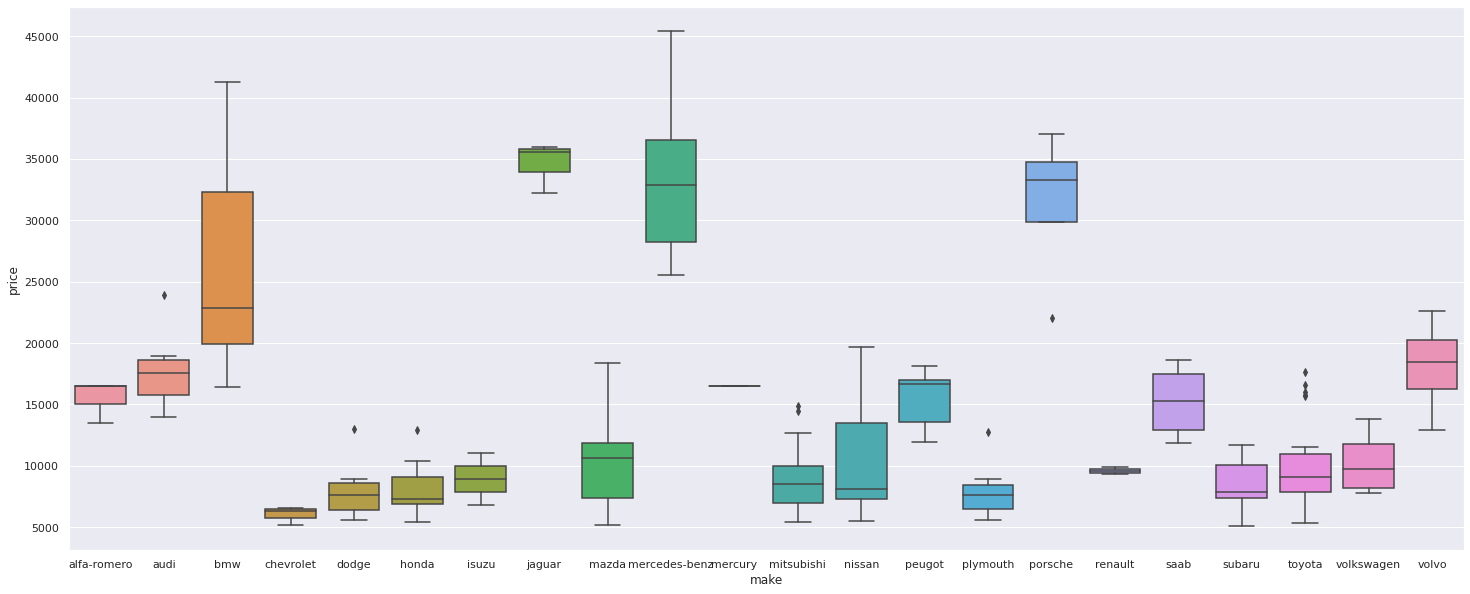

In [ ]:
# Bivariate plots

# make and price
plt.rcParams['figure.figsize']=(25,10)
ax = sns.boxplot(x="make", y="price", data=data)

# bmw, jaguar, mercedes and porsche produce expensive cars (price>25000), 
# while other car makers produce more affordable models (price<25000)

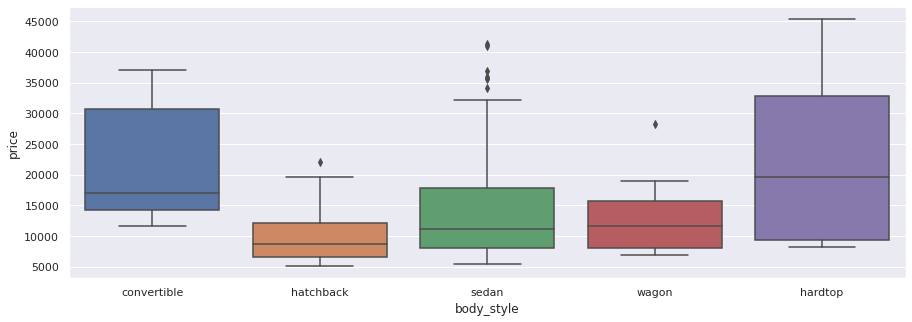

In [ ]:
# body-style and price
plt.rcParams['figure.figsize']=(15,5)
ax = sns.boxplot(x="body_style", y="price", data=data)

# hardtop models, followed by converible and sedan models, are more expensive than hatchback and wagon models

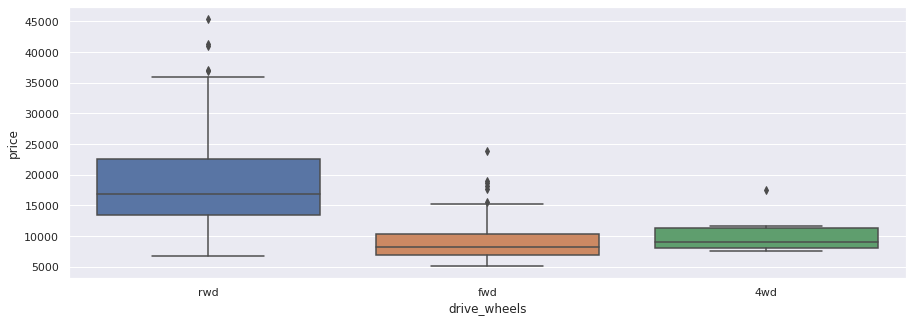

In [ ]:
# drive-wheels and price
plt.rcParams['figure.figsize']=(15,5)
ax = sns.boxplot(x="drive_wheels", y="price", data=data)

# cars with rwd wheel type are more expensive

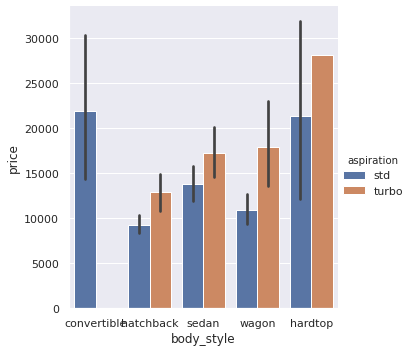

In [ ]:
# Multivariate plots

sns.catplot(data=data, x="body_style", y="price", hue="aspiration", kind='bar')
# turbo models are more expensive than standard models, and convertible model doesn't have turbo version

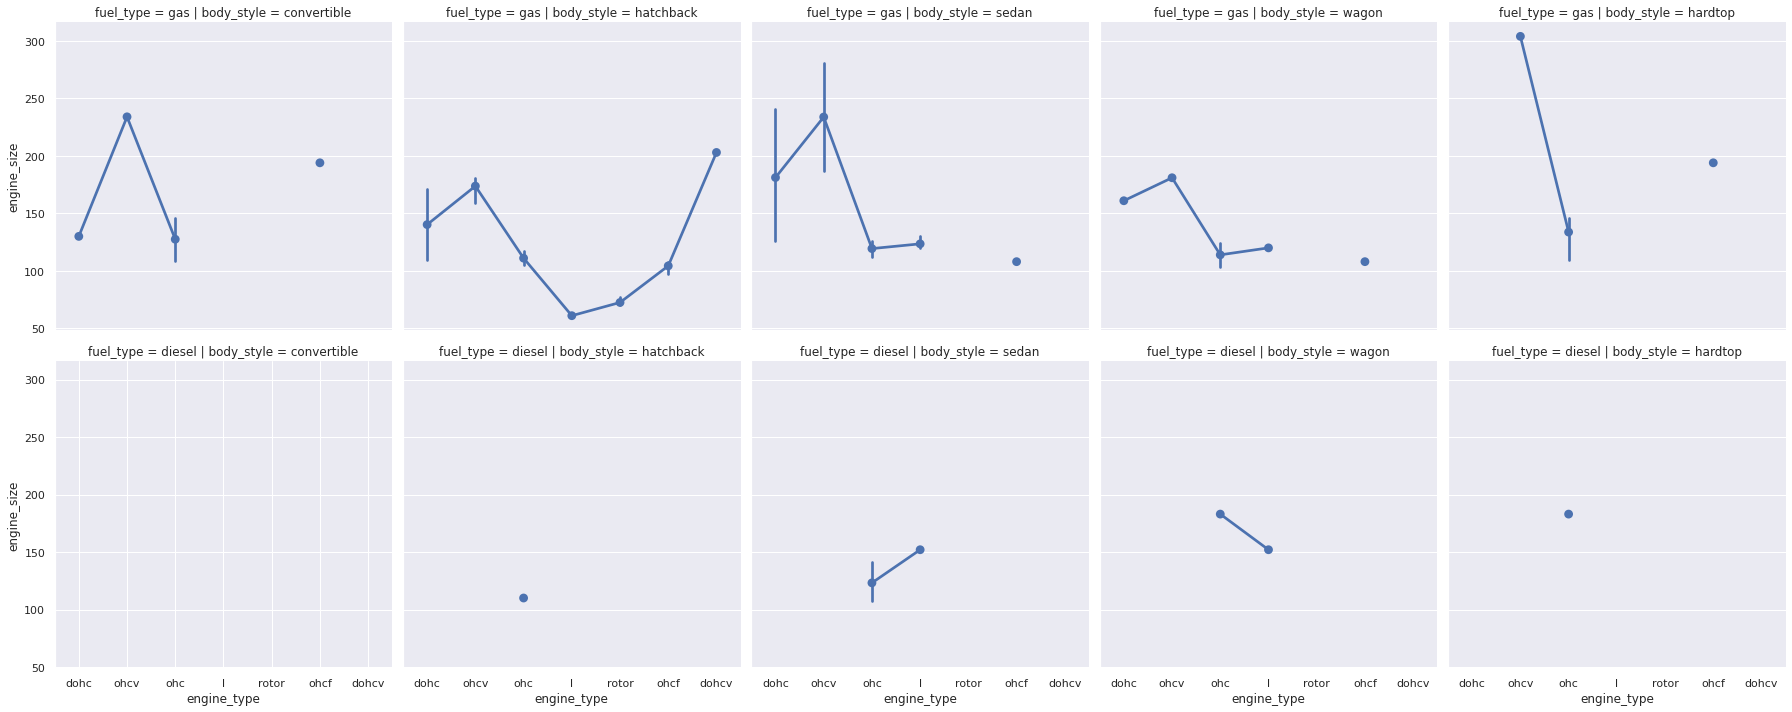

In [ ]:
sns.factorplot(data=data, x="engine_type", y="engine_size", col="body_style",row="fuel_type")
 
# engine type ohc and I have similar engine sizes, varying around 100-200
# engile ohcv type has bigger engine sizes
# hatchback car has all engine type options, convertible car does not have diesel option

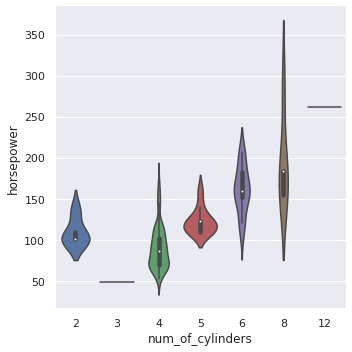

In [ ]:
sns.catplot(kind="violin", data=data, x="num_of_cylinders", y="horsepower")

# Cars which have 6, 8, 12 cylinders have hoursepower above 200

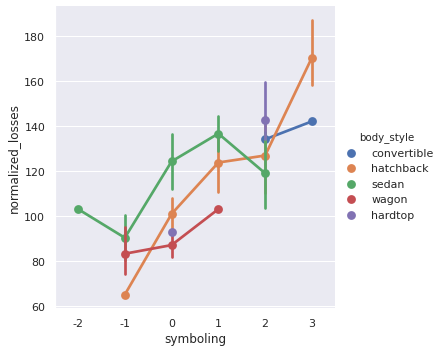

In [ ]:
sns.catplot(kind='point', data=data, y="normalized_losses", x="symboling" , hue="body_style")

# linear relationship between normalized losses and symboling (higher symboling = higher risk rating)
# convertible and hardtop car has risk rating > 0, and high losses
# hatchback car has highest loss at risk rating = 3
# sedan and wagon car still has loss with negative symboling

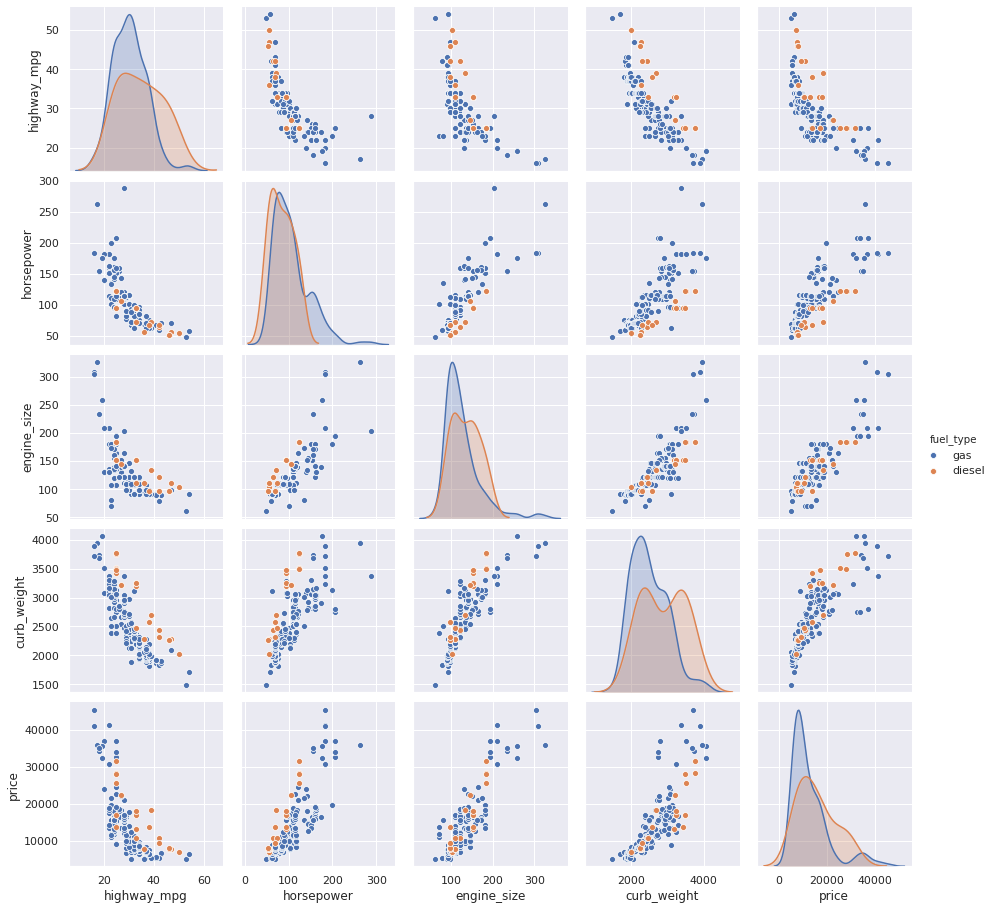

In [ ]:
sns.pairplot(data[["highway_mpg", "horsepower", "engine_size", "curb_weight","price", "fuel_type"]], hue="fuel_type", diag_kind="kde")

# curb_weight, engine_size and horsepower are positively correlated
# highway mpg decrease when curb_weight, engine_size and horsepower increase


FILL MISSING DATA

In [ ]:
filled_data = data.copy()
# From the heatmap, normalized_losses doesn't show strong relationship to any other variables,
# so fill the variable's missing data with its median
filled_data['normalized_losses'] = filled_data['normalized_losses'].fillna(filled_data['normalized_losses'].median())
# Missing proportion of other variables is small, so fill with medians
filled_data['num_of_doors'] = filled_data['num_of_doors'].fillna(filled_data['num_of_doors'].median())
filled_data['bore'] = filled_data['bore'].fillna(filled_data['bore'].median())
filled_data['stroke'] = filled_data['stroke'].fillna(filled_data['stroke'].median())
filled_data['horsepower'] = filled_data['horsepower'].fillna(filled_data['horsepower'].median())
filled_data['peak_rpm'] = filled_data['peak_rpm'].fillna(filled_data['peak_rpm'].median())
filled_data['price'] = filled_data['price'].fillna(filled_data['price'].median())

FEATURE SCALING

In [ ]:
# Create One Hot Encoder function
def OHC_data(dataset, target_col):
  encoded_data = filled_data.copy()
  cat_cols = encoded_data.columns[encoded_data.dtypes==object].tolist()
  one_hot = pd.get_dummies(encoded_data[cat_cols])
  encoded_data = encoded_data.drop(cat_cols,axis = 1)
  encoded_data = encoded_data.join(one_hot)
  # move target variable to the last column
  cols = [col for col in encoded_data if col != target_col] + [target_col]
  encoded_data = encoded_data[cols]
  return encoded_data

# Create Label Encoder function
def LE_data(dataset):
  encoded_data = dataset.copy()
  for col in encoded_data.columns:
    if (encoded_data[col].dtypes == object):
      encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col])
  return encoded_data

# Get datasets 
encoded_data_ohc = OHC_data(filled_data, 'price') # One Hot Encoded data
encoded_data_le = LE_data(filled_data) # Label Encoded data

In [ ]:
# Rescaling function
def rescale_data(dataset):
  cols=dataset.columns.to_list()
  scaler = MinMaxScaler() # initiate scaler
  scaled_data  = scaler.fit_transform(dataset) # transform data
  scaled_data = pd.DataFrame(scaled_data, columns=cols) # convert the result to dataframe
  return scaled_data

# Get rescaled dataset
rescaled_data_ohc = rescale_data(encoded_data_ohc)
rescaled_data_le = rescale_data(encoded_data_le)

In [ ]:
# Standardizing function
def standardize_data(dataset):
  cols=dataset.columns.to_list()
  scaler = StandardScaler() # initiate scaler
  scaled_data  = scaler.fit_transform(dataset) # transform data
  scaled_data = pd.DataFrame(scaled_data, columns=cols) # convert the result to dataframe
  return scaled_data
  
# Get standardized dataset
standardized_data = standardize_data(encoded_data_le)

FEATURE SECLECTION

In [ ]:
# Create X, y for feature selection from label encoded and rescaled dataset
X_rescaled_le = rescaled_data_le.iloc[:, 0:-1] 
y_rescaled_le = rescaled_data_le.iloc[:, -1]

Feature 1: 1.312470
Feature 2: 1.868015
Feature 3: 5.014254
Feature 4: 2.599296
Feature 5: 6.469743
Feature 6: 0.439830
Feature 7: 1.046477
Feature 8: 103.103661
Feature 9: 25.055315
Feature 10: 105.532125
Feature 11: 181.015029
Feature 12: 224.354714
Feature 13: 4.084337
Feature 14: 416.090045
Feature 15: 1.147636
Feature 16: 175.597153
Feature 17: 578.339059
Feature 18: 73.962429
Feature 19: 80.496262
Feature 20: 1.429678
Feature 21: 1.084303
Feature 22: 260.871379
Feature 23: 2.363658
Feature 24: 164.302629
Feature 25: 187.610494


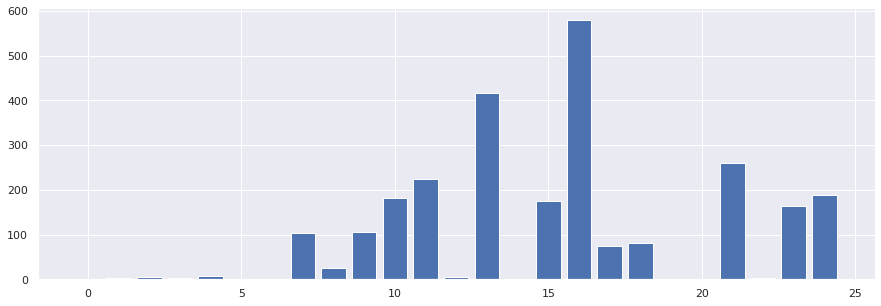

In [ ]:
# Select K Best using Pearson's Correlation Coefficient. 
# SelectKBest is a univariate feature selection that shows the relationship of each input variable to output variable
def Select_K_Best_Pearson(X,y):
  fs = SelectKBest(score_func=f_regression, k='all') # define feature selection
  features = fs.fit_transform(X, y) # apply feature selection
  return fs
# Show and plot scores of each features
fs_Pearson = Select_K_Best_Pearson(X_rescaled_le,y_rescaled_le)
for i in range(len(fs_Pearson.scores_)):
  print('Feature %d: %f' % (i+1, fs_Pearson.scores_[i]))
plt.bar([i for i in range(len(fs_Pearson.scores_))], fs_Pearson.scores_)
plt.show()

# symboling, normalized_losses, num of doors, body style, engine type,
# stroke, compression ratio are less important to the regresison model

In [ ]:
# Create Ranking function 
ranks = {} # define dictionary to store rankings
colnames = X_rescaled_le.columns # column name of input
# Create function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
  minmax = MinMaxScaler()
  ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
  ranks = map(lambda x: round(x,2), ranks)
  return dict(zip(names, ranks))

In [ ]:
# Recursive Feature Elimination works by recursively removing features and building a model on remaining features
# Define RFE for the LR classifier with 10 selected attributes
def RFE_fs(X,y):
  model = LinearRegression()
  rfe = RFE(model,10)
  rfe = rfe.fit(X, y)
  return rfe

rfe = RFE_fs(X_rescaled_le,y_rescaled_le)
print(rfe.ranking_)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
print(ranks["RFE"])

# symbolling, normalized losses, num of doors, body style, stroke, and highway_mpg are less important features. 

[15 16  1  4  7 14 10  1  1 11  8  1  1  1  9  1  1 12  1  1  6  5  2 13
  3]
{'symboling': 0.07, 'normalized_losses': 0.0, 'make': 1.0, 'fuel_type': 0.8, 'aspiration': 0.6, 'num_of_doors': 0.13, 'body_style': 0.4, 'drive_wheels': 1.0, 'engine_location': 1.0, 'wheel_base': 0.33, 'length': 0.53, 'width': 1.0, 'height': 1.0, 'curb_weight': 1.0, 'engine_type': 0.47, 'num_of_cylinders': 1.0, 'engine_size': 1.0, 'fuel_system': 0.27, 'bore': 1.0, 'stroke': 1.0, 'compression_ratio': 0.67, 'horsepower': 0.73, 'peak_rpm': 0.93, 'city_mpg': 0.2, 'highway_mpg': 0.87}


In [ ]:
# Linear models feature ranking

# Using Linear Regression
def LinReg_fs(X,y):
  lr = LinearRegression(normalize=True)
  lr = lr.fit(X,y)
  return lr 
# Using Ridge 
def Ridge_fs(X,y):
  ridge = Ridge(alpha=3)
  ridge = ridge.fit(X,y)
  return ridge
# Using Lasso
def Lasso_fs(X,y):
  lasso = Lasso(alpha=0.05)
  lasso = lasso.fit(X_rescaled_le,y_rescaled_le)
  return lasso

lr = LinReg_fs(X_rescaled_le,y_rescaled_le)
ridge = Ridge_fs(X_rescaled_le,y_rescaled_le)
lasso = Lasso_fs(X_rescaled_le,y_rescaled_le)

ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

print(ranks["LinReg"])
print(ranks["Ridge"])
print(ranks["Lasso"]) 

{'symboling': 0.0, 'normalized_losses': 0.0, 'make': 0.07, 'fuel_type': 0.15, 'aspiration': 0.03, 'num_of_doors': 0.0, 'body_style': 0.04, 'drive_wheels': 0.05, 'engine_location': 0.26, 'wheel_base': 0.02, 'length': 0.03, 'width': 0.08, 'height': 0.05, 'curb_weight': 0.06, 'engine_type': 0.04, 'num_of_cylinders': 0.39, 'engine_size': 1.0, 'fuel_system': 0.01, 'bore': 0.13, 'stroke': 0.17, 'compression_ratio': 0.19, 'horsepower': 0.1, 'peak_rpm': 0.08, 'city_mpg': 0.03, 'highway_mpg': 0.05}
{'symboling': 0.08, 'normalized_losses': 0.1, 'make': 0.47, 'fuel_type': 0.1, 'aspiration': 0.0, 'num_of_doors': 0.05, 'body_style': 0.33, 'drive_wheels': 0.43, 'engine_location': 0.81, 'wheel_base': 0.33, 'length': 0.38, 'width': 0.38, 'height': 0.2, 'curb_weight': 0.66, 'engine_type': 0.28, 'num_of_cylinders': 0.59, 'engine_size': 1.0, 'fuel_system': 0.13, 'bore': 0.08, 'stroke': 0.18, 'compression_ratio': 0.11, 'horsepower': 0.49, 'peak_rpm': 0.05, 'city_mpg': 0.18, 'highway_mpg': 0.29}
{'symbolin

In [ ]:
# Feature importance for Random Forest Regression

def feature_importance(X,y):
  rf = RandomForestRegressor(n_jobs=-1, verbose=3)
  rf = rf.fit(X,y)
  return rf

rf = feature_importance(X_rescaled_le,y_rescaled_le)
ranks["RF"] = ranking(rf.feature_importances_, colnames)
print(ranks["RF"])

building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100building tree 6 of 100

building tree 7 of 100building tree 8 of 100

building tree 10 of 100building tree 9 of 100

building tree 12 of 100building tree 11 of 100

building tree 13 of 100building tree 14 of 100

building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100building tree 25 of 100

building tree 26 of 100building tree 27 of 100

building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100building tree 32 of 100

building tree 33 of 100
building tree 34 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100building tree 47 of 100

building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 53 of 100building tree 52 of 100

building tree 54 of 100building tree 55 of 100

building tree 56 of 100
building tree 57 of 100
building tree 58 of 100building tree 59 of 100

building tree 60 of 100building tree 61 of 100

building tree 62 of 100building tree 63 of 100

building tree 65 of 100
building tree 64 of 100
building tree 66 of 100
building tree 68 of 100building tree 67 of 100

building tree 69 of 100building tree 70 of 100

building tree 71 of 100
building tree 72 of 100building tree 73 of 100

building tree 74 of 100
building tree 75 of 100
building tree 76

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


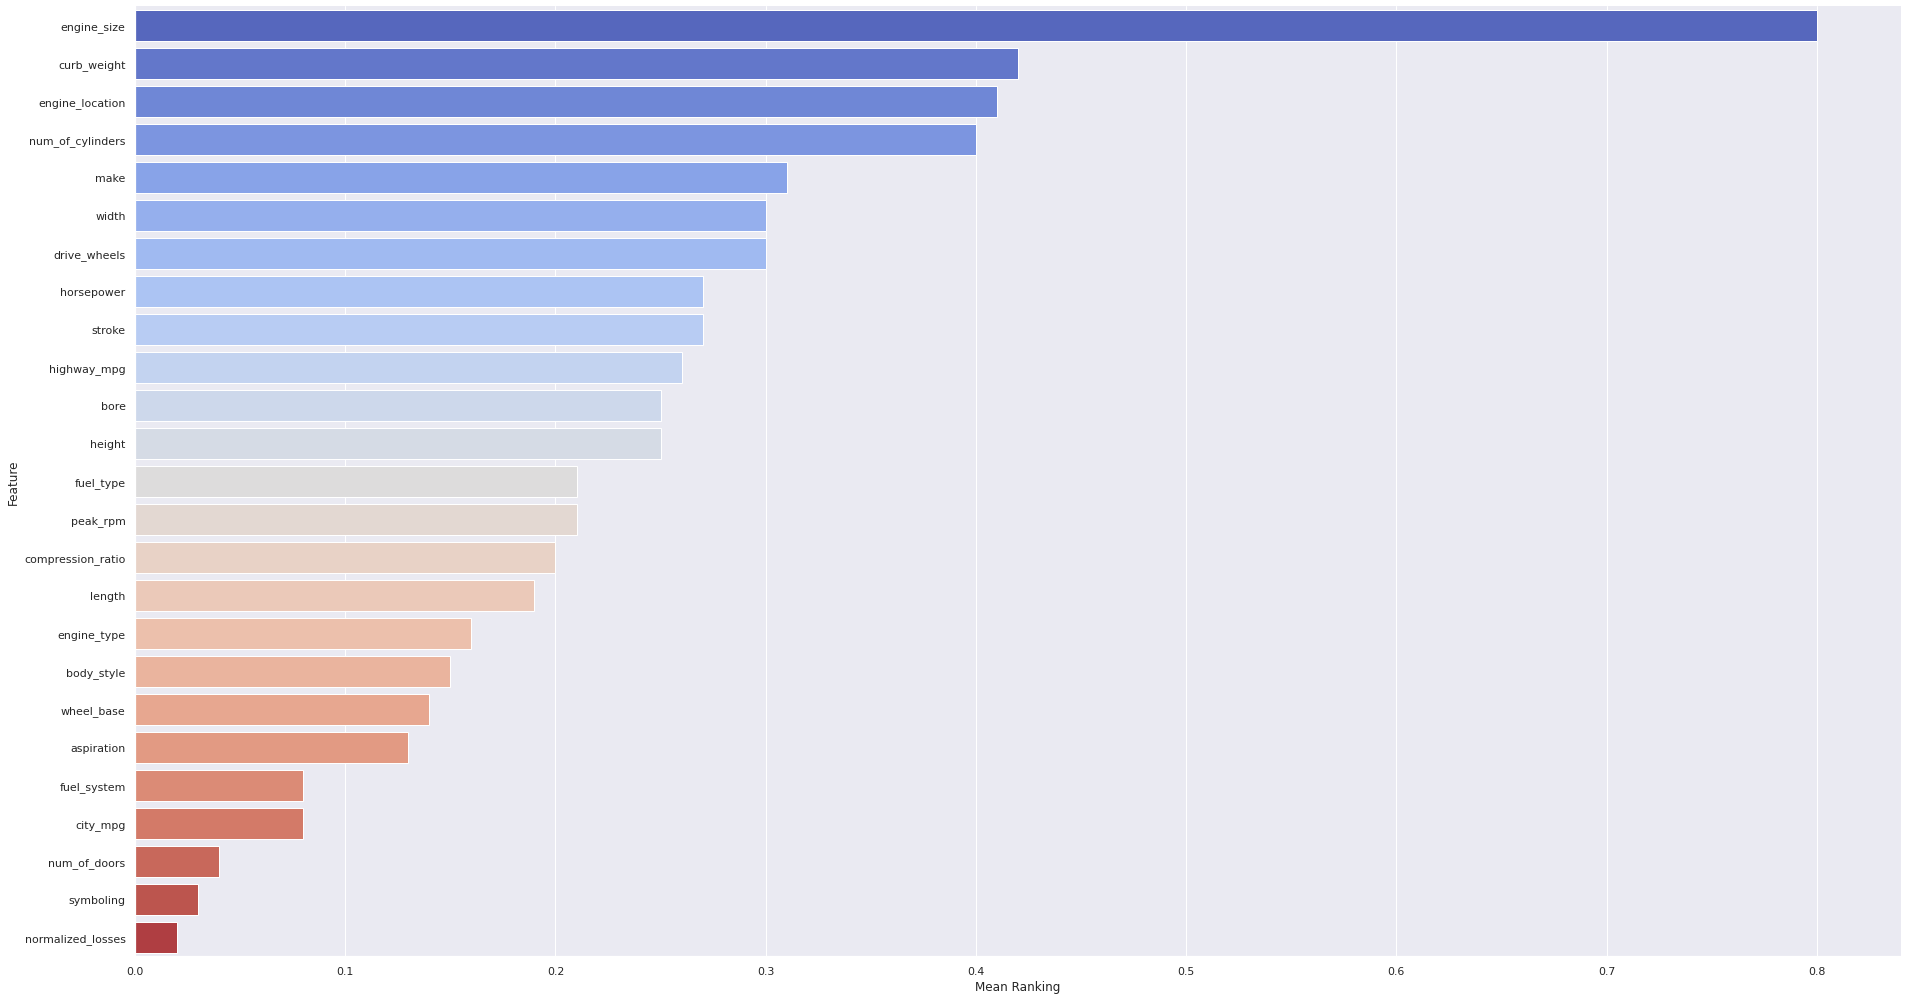

In [ ]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
  r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
# Plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", size=14, aspect=1.9, palette='coolwarm')

In [ ]:
# symboling, normalized_losses and num_of_doors has tiny impact for the regression on the dataset
# so, technically, we can remove these features.

BASELINE MODEL

In [ ]:
# Create many datasets with and without categorical features, since encoder may mislead the meaning of categorical values

num_data = filled_data.select_dtypes(include=['float64', 'int64']).copy(deep='False') # copy of numerical dataset
rescaled_num_data = rescale_data(num_data) # rescaled numerical dataset
standardized_data_num = standardize_data(num_data) # standardized numerical dataset

# Create X, y of different datasets to evaluate algorithms

X_rescaled_num = rescaled_num_data.iloc[:,0:-1] # X of rescaled numerical dataset
y_rescaled_num = rescaled_num_data.iloc[:,-1]
X_standardized = standardized_data.iloc[:,0:-1] # X of standardized dataset
y_standardized = standardized_data.iloc[:,-1]
X_standardized_num = standardized_data_num.iloc[:,0:-1] # X of standardized numerical dataset
y_standardized_num = standardized_data_num.iloc[:,-1]
X_rescaled_ohc = rescaled_data_ohc.iloc[:, 0:-1] # X of One Hot Encoded dataset
y_rescaled_ohc = rescaled_data_ohc.iloc[:, -1]

In [ ]:
# Test options and evaluation metrics
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
mse = 'neg_mean_squared_error'
mae = 'neg_mean_absolute_error'
rmse = 'neg_root_mean_squared_error'
r2 = 'r2'

In [ ]:
# Spot check algorithms 
# Linear models: Linear Regression (LR), Ridge Regression (RR), Lasso Regression (LR), ElasticNet(EN)
# Nonlinear models: Classification and Regression Trees (CART), Support Vector Regression (SVR) and K-nearest Neighbors(KNN)
models = []
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))

In [ ]:
# Evaluate each model in turn
def evaluate_algorithms(X, y, models, scoring):
  results = []
  names = []
  message = []
  for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    message.append([name, cv_results.mean(), cv_results.std()])
  return results, names, message

In [ ]:
# Get results of algorithm evaluation
# MSE method
results_le_mse, names_le_mse, message_le_mse = evaluate_algorithms(X_rescaled_le, y_rescaled_le, models, mse) #evaluate on Label Encoded dataset
results_ohc_mse, names_ohc_mse, message_ohc_mse = evaluate_algorithms(X_rescaled_ohc, y_rescaled_ohc, models, mse) #evaluate on One Hot Encoded dataset
results_num_mse, names_num_mse, message_num_mse = evaluate_algorithms(X_rescaled_num, y_rescaled_num, models, mse) #evaluate on only-numerical dataset
results_std_mse, names_std_mse, message_std_mse = evaluate_algorithms(X_standardized, y_standardized, models, mse) #evaluate on standardized dataset
results_std_num_mse, names_std_num_mse, message_std_num_mse = evaluate_algorithms(X_standardized_num, y_standardized_num, models, mse) #evaluate on standardized only-numerical dataset
# MAE method
results_le_mae, names_le_mae, message_le_mae = evaluate_algorithms(X_rescaled_le, y_rescaled_le, models, mse) #evaluate on Label Encoded dataset
results_ohc_mae, names_ohc_mae, message_ohc_mae = evaluate_algorithms(X_rescaled_ohc, y_rescaled_ohc, models, mse) #evaluate on One Hot Encoded dataset
results_num_mae, names_num_mae, message_num_mae = evaluate_algorithms(X_rescaled_num, y_rescaled_num, models, mse) #evaluate on only-numerical dataset
results_std_mae, names_std_mae, message_std_mae = evaluate_algorithms(X_standardized, y_standardized, models, mse) #evaluate on standardized dataset
results_std_num_mae, names_std_num_mae, message_std_num_mae = evaluate_algorithms(X_standardized_num, y_standardized_num, models, mse) #evaluate on standardized only-numerical dataset
# R2 method
results_le_r2, names_le_r2, message_le_r2 = evaluate_algorithms(X_rescaled_le, y_rescaled_le, models, r2) #evaluate on Label Encoded dataset
results_ohc_r2, names_ohc_r2, message_ohc_r2 = evaluate_algorithms(X_rescaled_ohc, y_rescaled_ohc, models, r2) #evaluate on One Hot Encoded dataset
results_num_r2, names_num_r2, message_num_r2 = evaluate_algorithms(X_rescaled_num, y_rescaled_num, models, r2) #evaluate on only-numerical dataset
results_std_r2, names_std_r2, message_std_r2 = evaluate_algorithms(X_standardized, y_standardized, models, r2) #evaluate on standardized dataset
results_std_num_r2, names_std_num_r2, message_std_num_r2 = evaluate_algorithms(X_standardized_num, y_standardized_num, models, r2) #evaluate on standardized only-numerical dataset

In [ ]:
# Define print-messages function
def print_msg(message):
  for i in range(0,len(message)):
    print(*message[i], sep = "\t")

In [ ]:
# Create list for comparing
message_mse = [message_le_mse, message_ohc_mse, message_num_mse, message_std_mse, message_std_num_mse] #Metric = MSE
message_mae = [message_le_mae, message_ohc_mae, message_num_mae, message_std_mae, message_std_num_mae] #Metric = MAE
message_r2 = [message_le_r2, message_ohc_r2, message_num_r2, message_std_r2, message_std_num_r2] #Metric = R2

In [ ]:
# Print scores by MSE metric
print('\t\t', 'Mean', '\t\t\t', "Std")
for i in range(len(message_mse)):
  print_msg(message_mse[i])
  print('\n')

		 Mean 			 Std
LR	-0.014388496345819637	0.006416934650094775
RIDGE	-0.012606751356603097	0.005652407362747865
LASSO	-0.039234067481388905	0.028349483210140622
EN	-0.039234067481388905	0.028349483210140622
CART	-0.014560043290361849	0.008814462732112827
SVR	-0.014027889311102559	0.005616080108211996
KNN	-0.019600533361411772	0.011682483225606582


LR	-1.069442716718107e+24	2.1224364469372708e+24
RIDGE	-0.01630863620892308	0.004328477994674155
LASSO	-0.039234067481388905	0.028349483210140622
EN	-0.039234067481388905	0.028349483210140622
CART	-0.016286550925566766	0.010416095679502822
SVR	-0.02088235530227671	0.00612415755036729
KNN	-0.022985001449719527	0.010600026974003321


LR	-0.010877313191633564	0.002876722150771044
RIDGE	-0.012371722121203169	0.0045365575560305455
LASSO	-0.039234067481388905	0.028349483210140622
EN	-0.039234067481388905	0.028349483210140622
CART	-0.021601172963067888	0.013706626164707329
SVR	-0.01361315567343462	0.004830102867852881
KNN	-0.018847698038602482	0.011

In [ ]:
# Overall, One hot encoded data make MSE very large, so we remove the option of using this dataset.

In [ ]:
# Now plot the distributions
def plot_distributions(results_le, names_le, results_num, names_num, results_std, names_std, results_std_num, names_std_num):
  fig = plt.figure(figsize=(20, 15))
  fig.suptitle('Algorithm Comparison', size=25)

  ax1=fig.add_subplot(221)
  plt.boxplot(results_le)
  ax1.set_xticklabels(names_le)
  ax1.title.set_text('Label Encoded data')

  ax2=fig.add_subplot(222)
  plt.boxplot(results_num)
  ax2.set_xticklabels(names_num)
  ax2.title.set_text('Numerical-only data')

  ax3=fig.add_subplot(223)
  plt.boxplot(results_std)
  ax3.set_xticklabels(names_std)
  ax3.title.set_text('Standardized data')

  ax4=fig.add_subplot(224)
  plt.boxplot(results_std_num)
  ax4.set_xticklabels(names_std_num)
  ax4.title.set_text('Standardized numerical-only data')

  plt.show()

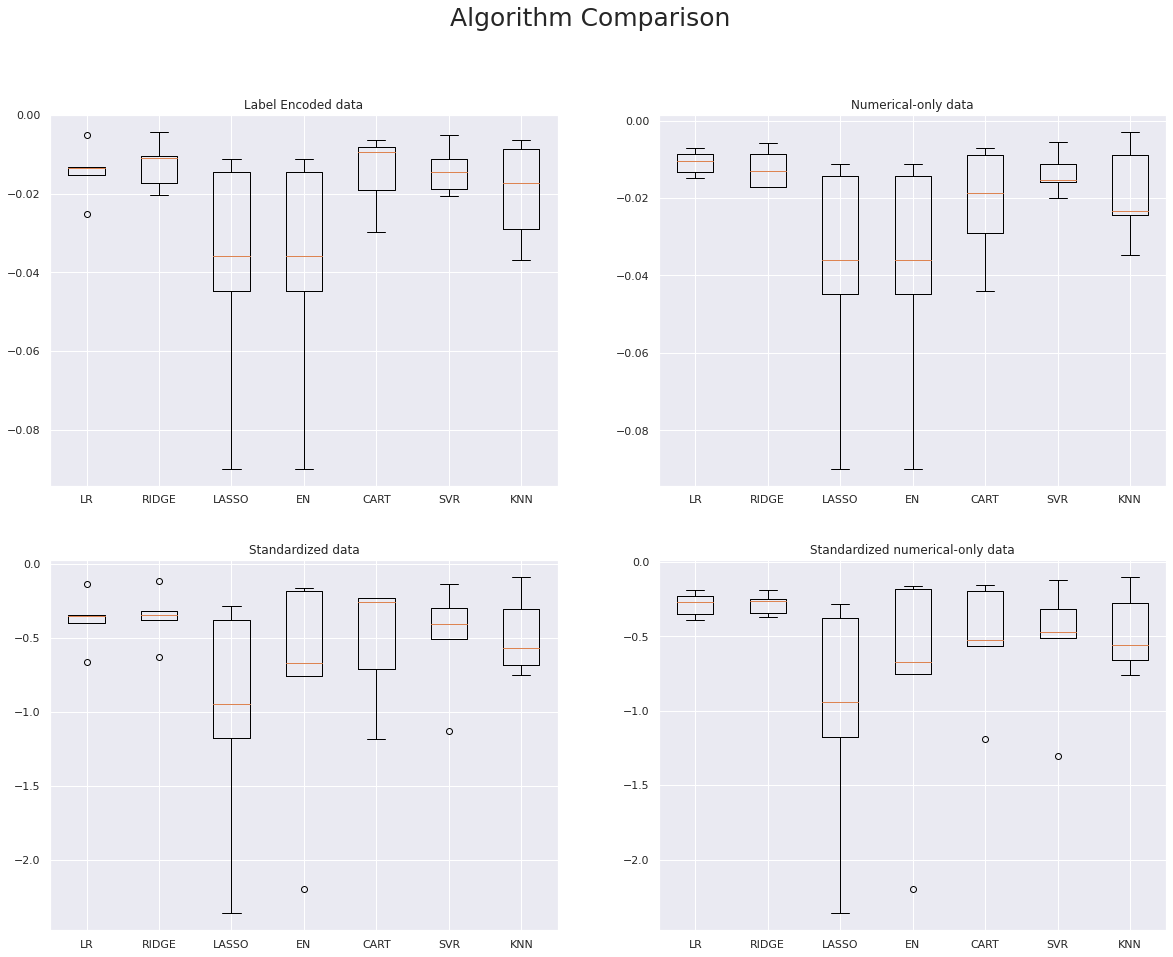

In [ ]:
# Comparing between datasets using MSE metric
plot_distributions(results_le_mse, names_le_mse, results_num_mse, names_num_mse, results_std_mse, names_std_mse, results_std_num_mse, names_std_num_mse)

# Linear models (Linear Regression, Ridge) have smallest and least deviated MSE; SVR is ok

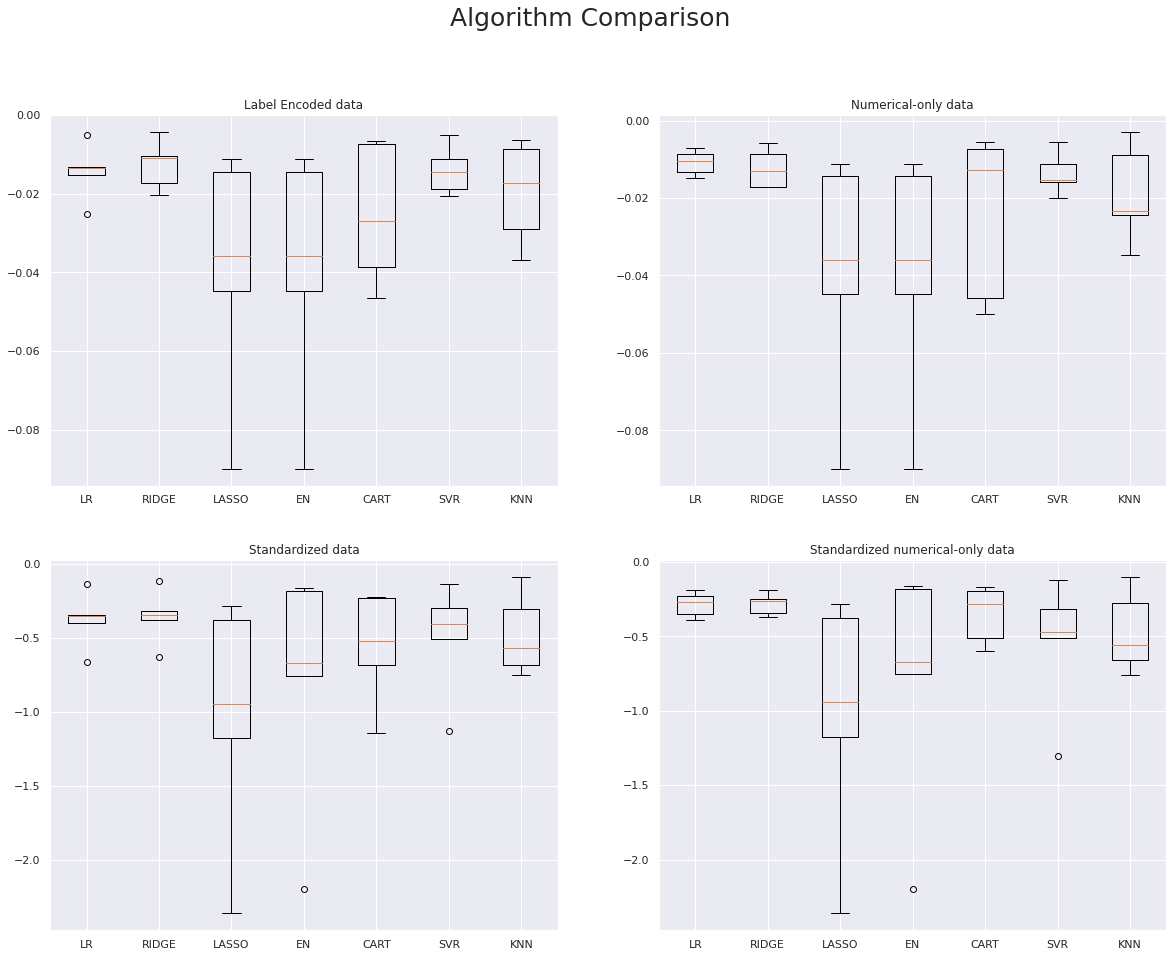

In [ ]:
# Comparing between datasets using MAE metric
plot_distributions(results_le_mae, names_le_mae, results_num_mae, names_num_mae, results_std_mae, names_std_mae, results_std_num_mae, names_std_num_mae)

# Linear models (LR, Ridge) are better with lower and less deviated MAE

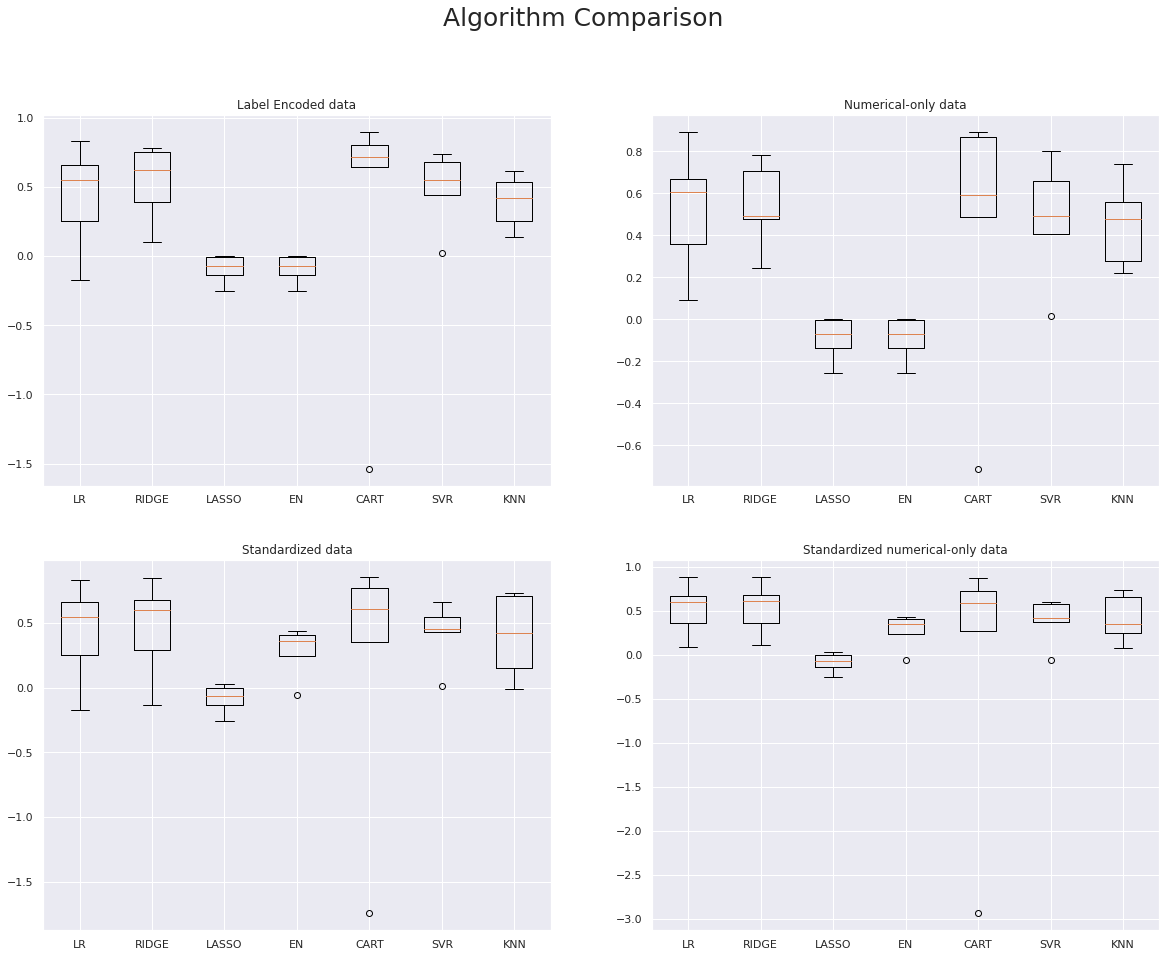

In [ ]:
# Comparing between datasets using R2 metric
plot_distributions(results_le_r2, names_le_r2, results_num_r2, names_num_r2, results_std_r2, names_std_r2, results_std_num_r2, names_std_num_r2)

# R2 score is relatively good from Linear Regression, Ridge and SVR

In [ ]:
# Comprehensively, we use linear models (LR, Ridge) for the regression on the dataset 
# SVR, CART, KNN can also be used because of good results

ENSEMBLE METHODS

In [ ]:
# Ensemble methods
ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor()))
ensembles.append(('ET', ExtraTreesRegressor()))

In [ ]:
# Get values
results_ensemble, names_ensemble, msg_ensemble = evaluate_algorithms(X_standardized, y_rescaled_le, ensembles, mse)
# Print results
print('\t\t', 'Mean', '\t\t\t', "Std")
print_msg(msg_ensemble)

		 Mean 			 Std
AB	-0.012606410407698814	0.00975354335168353
GBM	-0.01152058932835156	0.0064115773729069726
RF	-0.010914836573466572	0.005199466407139228
ET	-0.010635641442986949	0.004185191878162852


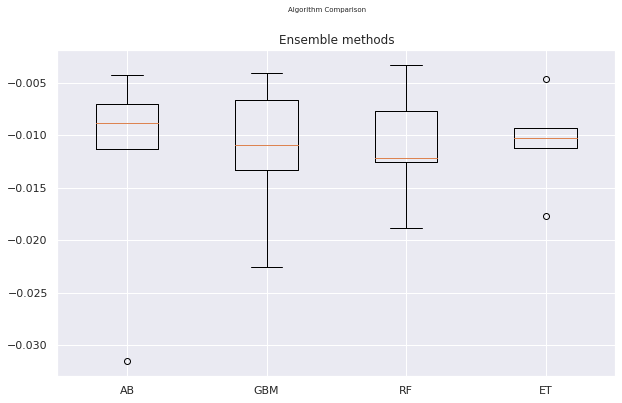

In [ ]:
# Plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison', size=7)

ax=fig.add_subplot(111)
plt.boxplot(results_ensemble)
ax.set_xticklabels(names_ensemble)
ax.title.set_text('Ensemble methods')

In [ ]:
# Random Forest Regressor is the best model. Now we tune the model
def RFR_param_selection(X,y):
  rfr=RandomForestRegressor()
  param_grid = {'n_estimators': [10, 20, 50], 'max_depth' : [3,4,5], 'criterion' :['mse', 'mae']}
  grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= kfold)
  grid.fit(X, y)
  grid = grid.best_params_
  return grid

param_RFR = RFR_param_selection(X_rescaled_le, y_rescaled_le)
print(param_RFR)

# Best params for RFR are criterion= 'mse', max_depth= 5, n_estimators= 50

{'criterion': 'mae', 'max_depth': 4, 'n_estimators': 20}


TUNING PARAMETERS

In [ ]:
# Define function for finding best alpha for Ridge, Lasso, ElasticNet
def find_best_alpha(regressor):
  param_grid = {'alpha': uniform()}
  research = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, n_iter=100, random_state=seed)
  research.fit(X_rescaled_le, y_rescaled_le)
  return research.best_score_, research.best_estimator_.alpha

In [ ]:
# Tuning for Ridge
ridge_score, ridge_alpha = find_best_alpha(Ridge())
print('Ridge best score & alpha: \t', ridge_score, '\t', ridge_alpha)
# Tuning for Lasso
lasso_score, lasso_alpha = find_best_alpha(Lasso())
print('Lasso best score & alpha: \t', lasso_score, '\t', lasso_alpha)
# Tuning for ElasticNet
en_score, en_alpha = find_best_alpha(ElasticNet())
print('ElasticNet best score & alpha: \t', en_score, '\t', en_alpha)

# all regressors has similar best scores at best alphas
# best alpha for Ridge is close to 1, which is the default alpha of the Ridge regressor
# best alphas for Lasso and EN are approximately 0, which will make these regressors the same as Linear Regressor

Ridge best score & alpha: 	 0.5303198990903614 	 0.9779895119966027
Lasso best score & alpha: 	 0.5117844855931547 	 0.0014268805627581926
ElasticNet best score & alpha: 	 0.5104450781512913 	 0.0014268805627581926


In [ ]:
# Tuning KNN
def k_neighbors_selection(X,y):
  k_values = np.array([1,2,3,4,5,7,9])
  param_grid = dict(n_neighbors = k_values)
  knr = KNeighborsRegressor()
  grid = GridSearchCV(estimator=knr, param_grid=param_grid, scoring = mse, cv=kfold) 
  grid_result = grid.fit(X, y)
  return grid_result

n_neighbors = k_neighbors_selection(X_standardized, y_rescaled_le)
print('Best %f using %s' %(n_neighbors.best_score_,n_neighbors.best_params_))

# n_neighbors = 4 is best for KNN on this dataset

Best -0.016952 using {'n_neighbors': 4}


In [ ]:
# Tuning Support Vector Regressor
def svr_param_selection(X, y, num_folds):
  parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[60,80],'gamma': [1e-3, 1e-2, 1e-1],'epsilon':[0.0001, 0.001, 0.01]}
  svr = SVR()
  grid = GridSearchCV(svr, parameters)
  grid.fit(X,y)
  grid = grid.best_params_
  return grid
param_SVR = svr_param_selection(X_rescaled_le, y_rescaled_le, kfold)
print(param_SVR)

# Best params for SVR on this dataset are C= 60, epsilon= 0.001, gamma= 0.01, kernel= 'rbf'

{'C': 60, 'epsilon': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}


FINALIZE MODEL

In [ ]:
# Adjusted R square calculation
def calculate_adj_r2(X_train, y_pred):
  r2 = metrics.r2_score(y_test, y_pred)
  adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))
  return adj_r2

In [ ]:
# Linear Regressor was the most accurate model that we tested. Now we test the model on dataset using evaluation metrics
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_rescaled_le, y_rescaled_le, test_size=0.3, random_state=2020)
# initiate model
model_lr = LinearRegression()
model_lr.fit(X_train,y_train) # fit model
y_pred = model_lr.predict(X_test) # predict
# Print metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-square:', metrics.r2_score(y_test, y_pred))
print('Adjusted R-square:', calculate_adj_r2(X_rescaled_le, y_pred))

Mean Absolute Error: 0.06067736123958278
Mean Squared Error: 0.006206486976476501
Root Mean Squared Error: 0.07878126031282123
R-square: 0.7405788918359697
Adjusted R-square: 0.7043468934890381


In [ ]:
# Visualize results
coeff = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficient'])
intercept = lr.intercept_
print(coeff)
print('\nIntercept: \t', intercept)

                   Coefficient
symboling             0.018346
normalized_losses    -0.017326
make                 -0.103015
fuel_type             0.188873
aspiration            0.056684
num_of_doors          0.021965
body_style           -0.060045
drive_wheels          0.078117
engine_location       0.323114
wheel_base            0.042443
length                0.052149
width                 0.114263
height                0.076411
curb_weight           0.091882
engine_type           0.062855
num_of_cylinders     -0.464917
engine_size           1.176829
fuel_system           0.034192
bore                 -0.168627
stroke               -0.213605
compression_ratio     0.236372
horsepower           -0.131657
peak_rpm              0.104326
city_mpg              0.047534
highway_mpg          -0.078111

Intercept: 	 -0.1831564300208581


In [ ]:
# Actual values vs predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred.head(25)

,Actual,Predicted
72,0.743210,0.568575
154,0.069013,-0.002799
147,0.126111,0.101500
31,0.043121,0.018508
192,0.216648,0.087134
2,0.282558,0.366687
60,0.083834,0.166377
81,0.083933,0.095214
35,0.054044,0.118706
181,0.263939,0.250862


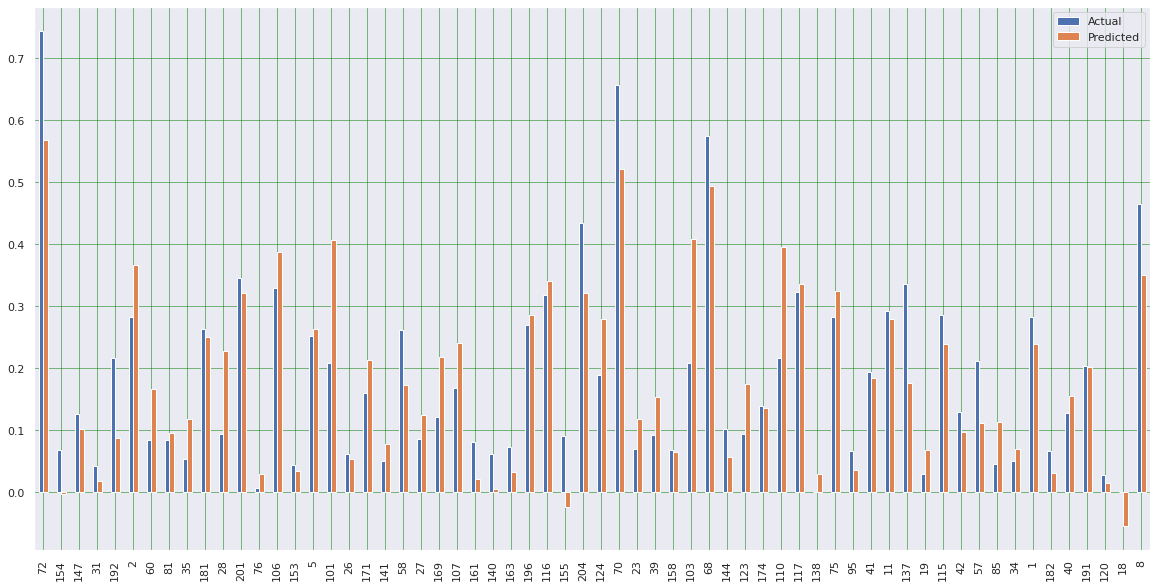

In [ ]:
# Plot the difference between actual values and predicted values
actual_vs_pred.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

[]

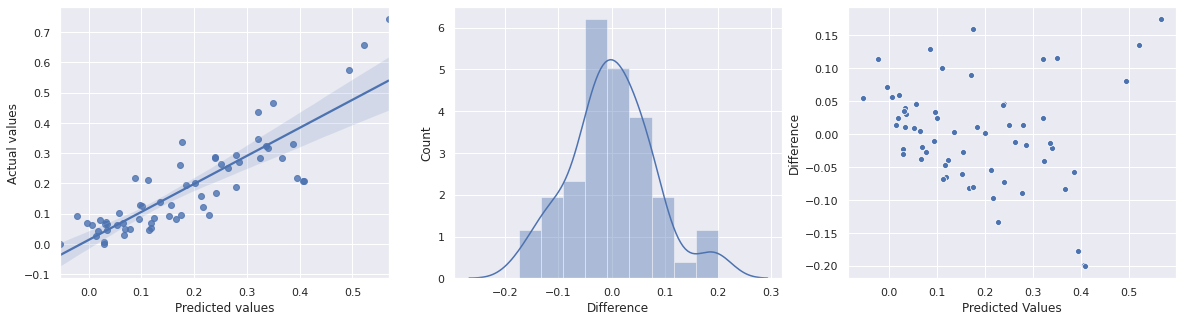

In [ ]:
# Visualize the difference between actuality and prediction
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax1 = sns.regplot(x=y_pred, y=y_test, ax=ax[0])
ax1.set(xlabel='Predicted values', ylabel='Actual values')
plt.plot()

ax2 = sns.distplot(y_pred-y_test, ax=ax[1])
ax2.set(xlabel='Difference', ylabel='Count')
plt.plot()

ax3 = sns.scatterplot(x=y_pred, y=y_test-y_pred, ax=ax[2])
ax3.set(xlabel='Predicted Values', ylabel='Difference')
plt.plot()

APPLY DIFFERENT MODELS USING FEATURE SELECTION OR PARAMETER TUNING

In [ ]:
# Predict dataset using feature selection. We removed least influenced features.
eliminated_features = ['symboling', 'normalized_losses', 'fuel_system', 'city_mpg', 'aspiration', 'body_style']
# Create datasets after eliminating features
X_fs = X_rescaled_le.drop(columns=eliminated_features)
y_fs = y_rescaled_le.copy()
# train test split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.3, random_state=2020)
# initiate model
model_lr_fs = LinearRegression()
model_lr_fs.fit(X_train_fs,y_train_fs)
y_pred_fs = model_lr_fs.predict(X_test_fs)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_fs, y_pred_fs))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_fs, y_pred_fs))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_fs, y_pred_fs)))
print('R-square:', metrics.r2_score(y_test_fs, y_pred_fs))
print('Adjusted R-square:', calculate_adj_r2(X_train_fs, y_pred_fs))

# Other metrics remain unchanged, R-square decreases due to smaller number of features

Mean Absolute Error: 0.0612072254298934
Mean Squared Error: 0.006744769563670401
Root Mean Squared Error: 0.08212654603519133
R-square: 0.7180795510970772
Adjusted R-square: 0.6745308638681704


In [ ]:
# Predict using Ridge Regression with alpha = 1
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train,y_train)
y_pred_ridge = model_ridge.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('R-square:', metrics.r2_score(y_test, y_pred_ridge))
print('Adjusted R-square:', calculate_adj_r2(X_rescaled_le, y_pred_ridge))

# Result is slightly better than LR's

Mean Absolute Error: 0.05564480096756488
Mean Squared Error: 0.005574667646362073
Root Mean Squared Error: 0.07466369697759463
R-square: 0.7669879170057594
Adjusted R-square: 0.7344443299953907


In [ ]:
# Predict using KNN with k=4
model_knn = KNeighborsRegressor(n_neighbors=4)
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('R-square:', metrics.r2_score(y_test, y_pred_knn))
print('Adjusted R-square:', calculate_adj_r2(X_rescaled_le, y_pred_knn))

# Result is similar to LR's

Mean Absolute Error: 0.05449184058836814
Mean Squared Error: 0.007144349025990189
Root Mean Squared Error: 0.08452425111167912
R-square: 0.7013777764365534
Adjusted R-square: 0.659670761972385


In [ ]:
# Predict using Random Forest Regression
model_rfr = RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=50)
model_rfr.fit(X_train,y_train)
y_pred_rfr = model_rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('R-square:', metrics.r2_score(y_test, y_pred_rfr))
print('Adjusted R-square:', calculate_adj_r2(X_rescaled_le, y_pred_rfr))

# RFR gets lower errors and higher R-square

Mean Absolute Error: 0.04233905514479638
Mean Squared Error: 0.003540221565881376
Root Mean Squared Error: 0.05949976105734691
R-square: 0.8520244696801834
Adjusted R-square: 0.8313574961718292


In [ ]:
# Predict using Support Vector Regression
model_svr = SVR(C=60, epsilon=0.001, gamma=0.01, kernel='rbf')
model_svr.fit(X_train,y_train)
y_pred_svr = model_svr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))
print('R-square:', metrics.r2_score(y_test, y_pred_svr))
print('Adjusted R-square:', calculate_adj_r2(X_rescaled_le, y_pred_svr))

# Result is slightly better than LR's

Mean Absolute Error: 0.047072126611190104
Mean Squared Error: 0.004369616758847206
Root Mean Squared Error: 0.06610307677292492
R-square: 0.817357093291477
Adjusted R-square: 0.7918483074383313
